# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

#1. The average tumor volume was the smallest in mice treated with Capomulin and Ramicane.
#2. Not all of the reegimen drugs were used the same amount of times. This could be a potential limitation to data.
#3. According to the scatter plot comparing mouse weight and average tumor volume, 

In [201]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID"])

In [2]:
# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [3]:
# Checking the number of mice.
#number_mice=mouse_study_complete["Mouse ID"].value_counts()
#len(number_mice)
number_mice=mouse_study_complete["Mouse ID"].unique()
len(number_mice)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mice=[]
#duplicate_mice=mouse_study_complete.duplicated(["Mouse ID","Timepoint"], keep=False)
#duplicate_mice
#len(duplicate_mice)
#duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique() duplicate_mouse_ids
#df_bigdata_duplicates = df_bigdata[df_bigdata.duplicated(cols='ID')]

duplicate_mice = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_new= mouse_study_complete[mouse_study_complete["Mouse ID"] != "g989"]
mouse_study_new

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [7]:
# Checking the number of mice in the clean DataFrame.

unique_mice=mouse_study_new["Mouse ID"].unique()
num_unique_mice=len(unique_mice)
num_unique_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_drug=mouse_study_new.groupby(mouse_study_new["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

med_drug=mouse_study_new.groupby(mouse_study_new["Drug Regimen"]).median()["Tumor Volume (mm3)"]

var_drug=mouse_study_new.groupby(mouse_study_new["Drug Regimen"]).var()["Tumor Volume (mm3)"]

std_drug=mouse_study_new.groupby(mouse_study_new["Drug Regimen"]).std()["Tumor Volume (mm3)"]

sem_drug=mouse_study_new.groupby(mouse_study_new["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

groupby_drug_df=pd.DataFrame({"Mean Tumor Volume": mean_drug,
                "Median Tumor Volume":med_drug,
                "Tumor Volume Variance": var_drug,
                "Tumor Volume Std. Dev.": std_drug,
                "Tumor Volume SEM": sem_drug})
groupby_drug_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#agg_drug_df=mouse_study_new.groupby(mouse_study_new["Drug Regimen"]).mean().median().var().std().sem()["Tumor Volume (mm3)"]


agg_drug_df=mouse_study_new.groupby(mouse_study_new["Drug Regimen"]).agg([np.mean,np.median,np.var,np.std,st.sem])["Tumor Volume (mm3)"]
agg_drug_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

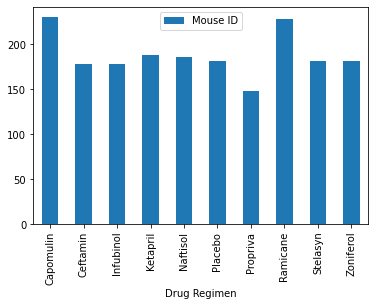

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mouse_study_new.groupby("Drug Regimen").count().plot(y="Mouse ID",kind='bar')


In [11]:
mouse_drug=mouse_study_new.groupby(mouse_study_new["Mouse ID"]).count()["Drug Regimen"]

mouse_drug_df=pd.DataFrame({
                "Drug Regimen":mouse_drug
})

mouse_drug_df

mouse_drug_df.reset_index(inplace=True)
mouse_drug_df

,Mouse ID,Drug Regimen
0,a203,10
1,a251,10
2,a262,10
3,a275,10
4,a366,7
...,...,...
243,z435,3
244,z578,10
245,z581,10
246,z795,10


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

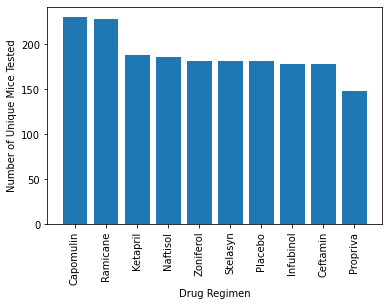

In [12]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.

mouse_count = mouse_study_new["Drug Regimen"].value_counts()
x_axis=mouse_count.index.values
y_axis=mouse_count.values
plt.bar(x_axis, mouse_count)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xticks(rotation = 90)

<AxesSubplot:ylabel='Sex'>

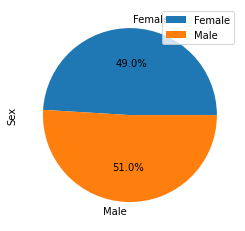

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender=mouse_study_new["Sex"]
gender_df=pd.DataFrame(gender)
gender_df


gender_df.groupby(gender).count().plot(y="Sex",kind='pie',autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f8be41637c0>,
 [Text(-0.6814042419013431, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370962, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

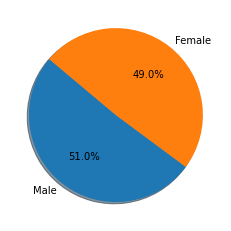

In [220]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#gender_groups = mouse_study_new.groupby('Sex')
#gender_mice = gender_groups.plot(kind="pie", y=mouse_study_new['Sex'])

labels=["Male","Female"]
plt.pie(gender_df.value_counts(), autopct="%1.1f%%", labels=labels, shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


dtype=float
mouse_study_new["Timepoint"].astype(dtype)
grouped_df = mouse_study_new.groupby("Mouse ID")["Timepoint"].max()
tumor_volume = pd.merge(mouse_study_new, grouped_df, how="right", on=["Mouse ID","Timepoint"])
tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [224]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
       # Determine outliers using upper and lower bounds
        
tumor_vol_list_2=[]

for drug in treatment_list:
    tumor_volume_2=tumor_volume.loc[tumor_volume["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    tumor_vol_list_2.append(tumor_volume_2)
    quartiles=tumor_volume_2.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr) 
    outlier=tumor_volume_2[(tumor_volume_2<lower_bound)]
    print(drug,outlier)       

    #print(f"Capomulin's potential outliers: {outlier}")
    #print(f"Ramicane's potential outliers: {outlier} ")
    #print(f"Infubinol's potential outliers: {outlier} ")
    #print(f"Ceftamin's potential outliers: {outlier} ")



Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


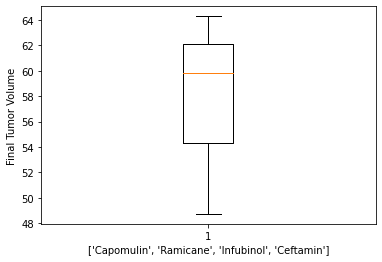

In [236]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume")
ax1.set_xlabel(treatment_list)
ax1.boxplot(quartiles)
plt.show()

## Line and Scatter Plots

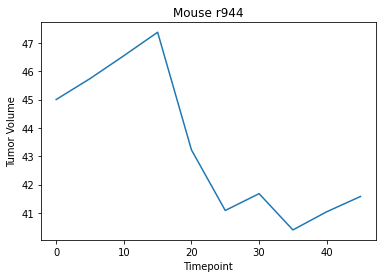

In [180]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_regimen=mouse_study_new.loc[mouse_study_new["Mouse ID"] == "r944","Tumor Volume (mm3)"]
cap_time=mouse_study_new.loc[mouse_study_new["Mouse ID"]=="r944","Timepoint"]
plt.title("Mouse r944")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.plot(cap_time,cap_regimen)
plt.show()


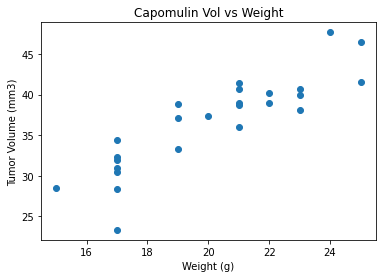

In [221]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


avg_tumor_volume=tumor_volume.loc[tumor_volume["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]
mouse_weight=tumor_volume.loc[tumor_volume["Drug Regimen"]=="Capomulin","Weight (g)"]
plt.title("Capomulin Vol vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(mouse_weight,avg_tumor_volume, marker="o")

## Correlation and Regression

The correlation coefficient for average tumor volume and mouse weight is 0.88


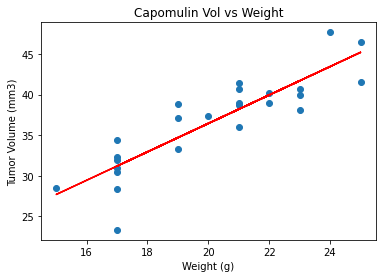

In [223]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

avg_tumor_volume=tumor_volume.loc[tumor_volume["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]
mouse_weight=tumor_volume.loc[tumor_volume["Drug Regimen"]=="Capomulin","Weight (g)"]

vol_weight_correlation = round(st.pearsonr(avg_tumor_volume,mouse_weight)[0],2)
print(f"The correlation coefficient for average tumor volume and mouse weight is {vol_weight_correlation}")


linregress(mouse_weight,avg_tumor_volume)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight,avg_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mouse_weight,regress_values,"r-")
plt.title("Capomulin Vol vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(mouse_weight,avg_tumor_volume, marker="o")
